# Analiza podatkov s pandas

[Pandas quick-start guide](http://pandas.pydata.org/pandas-docs/stable/10min.html)  
[Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/)  
[Lecture notes on pandas](../predavanja/Analiza podatkov s knjižnico Pandas.ipynb)


### Naložimo pandas in podatke

In [4]:
# naložimo paket
import pandas as pd

# ker bomo delali z velikimi razpredelnicami, povemo, da naj se vedno izpiše le 10 vrstic
pd.options.display.max_rows = 10

# naložimo razpredelnico, s katero bomo delali
filmi = pd.read_csv('filmi.csv', index_col='id')

# select an interactive "notebook" plot style
%matplotlib notebook

Poglejmo si podatke.

In [5]:
filmi.head(10)

,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,opis
id,,,,,,,,
12349,The Kid,68,1921,8.3,NaN,90443,5450000.0,"The Tramp cares for an abandoned child, but ev..."
13442,"Nosferatu, simfonija groze",94,1922,8.0,NaN,77975,NaN,Vampire Count Orlok expresses interest in a ne...
15864,Zlata mrzlica,95,1925,8.2,NaN,85136,5450000.0,A prospector goes to the Klondike in search of...
17136,Metropolis,153,1927,8.3,98.0,136601,26435.0,In a futuristic city sharply divided between t...
17925,General,67,1926,8.2,NaN,68196,NaN,When Union spies steal an engineer's beloved l...
21749,Luči velemesta,87,1931,8.5,NaN,138228,19181.0,"With the aid of a wealthy erratic tippler, a d..."
22100,M - mesto isce morilca,117,1931,8.4,NaN,121443,28877.0,When the police in a German city are unable to...
24216,King Kong,100,1933,7.9,90.0,71806,10000000.0,A film crew goes to a tropical island for an e...
25316,Zgodilo se je neke noci,105,1934,8.1,87.0,81390,NaN,A spoiled heiress running away from her family...


## Proučevanje podatkov

Razvrstite podatke po ocenah.

In [6]:
filmi.sort_values("ocena")

,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,opis
id,,,,,,,,
5988370,Reis,108,2017,1.8,NaN,71685,NaN,A drama about the early life of Recep Tayyip E...
1213644,Disaster Movie,87,2008,1.9,15.0,80828,14190901.0,"Over the course of one evening, an unsuspectin..."
799949,Velik film,86,2007,2.3,17.0,96182,39739367.0,A comedic satire of films that are large in sc...
185183,Battlefield Earth,118,2000,2.4,9.0,71149,21471685.0,It's the year 3000 A.D.; the Earth is lost to ...
1098327,Dragonball Evolution,85,2009,2.6,45.0,63966,9353573.0,The young warrior Son Goku sets out on a quest...
...,...,...,...,...,...,...,...,...
71562,"Boter, II. del",202,1974,9.0,90.0,950252,57300000.0,The early life and career of Vito Corleone in ...
468569,Vitez teme,152,2008,9.0,84.0,1972591,534858444.0,When the menace known as the Joker emerges fro...
68646,Boter,175,1972,9.2,100.0,1372528,134966411.0,The aging patriarch of an organized crime dyna...


Poberite stolpec ocen.

In [7]:
filmi.ocena

id
12349      8.3
13442      8.0
15864      8.2
17136      8.3
17925      8.2
          ... 
5813916    9.4
5988370    1.8
6294822    7.2
6644200    7.7
7784604    7.3
Name: ocena, Length: 2500, dtype: float64

Ukaza `filmi['ocena']` in `filmi[['ocena']]` sta različna:

In [8]:
print(type(filmi['ocena']))
print(type(filmi[['ocena']]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


Stolpci objekta `DataFrame` so tipa `Series`. Z enojnimi oklepaji poberemo `Series`, z dvojnimi oklepaji pa `DataFrame` podtabelo. Večina operacij (grouping, joining, plotting,  filtering, ...) deluje na `DataFrame`. 

Tip `Series` se uporablja ko želimo npr. dodati stolpec.

Zaokrožite stolpec ocen z funkcijo `round()`.

In [9]:
zaokrozeno = round(filmi['ocena'])
zaokrozeno

id
12349      8.0
13442      8.0
15864      8.0
17136      8.0
17925      8.0
          ... 
5813916    9.0
5988370    2.0
6294822    7.0
6644200    8.0
7784604    7.0
Name: ocena, Length: 2500, dtype: float64

Dodajte zaokrožene vrednosti v podatke.

In [10]:
filmi["zaokrozeno"] = zaokrozeno
filmi.head()

,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,opis,zaokrozeno
id,,,,,,,,,
12349,The Kid,68,1921,8.3,NaN,90443,5450000.0,"The Tramp cares for an abandoned child, but ev...",8.0
13442,"Nosferatu, simfonija groze",94,1922,8.0,NaN,77975,NaN,Vampire Count Orlok expresses interest in a ne...,8.0
15864,Zlata mrzlica,95,1925,8.2,NaN,85136,5450000.0,A prospector goes to the Klondike in search of...,8.0
17136,Metropolis,153,1927,8.3,98.0,136601,26435.0,In a futuristic city sharply divided between t...,8.0
17925,General,67,1926,8.2,NaN,68196,NaN,When Union spies steal an engineer's beloved l...,8.0


Odstranite novo dodani stolpec z metodo `.drop()` z podanim `columns = ` argumentom.

In [11]:
filmi = filmi.drop(columns=['zaokrozeno'])
filmi.head()

,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,opis
id,,,,,,,,
12349,The Kid,68,1921,8.3,NaN,90443,5450000.0,"The Tramp cares for an abandoned child, but ev..."
13442,"Nosferatu, simfonija groze",94,1922,8.0,NaN,77975,NaN,Vampire Count Orlok expresses interest in a ne...
15864,Zlata mrzlica,95,1925,8.2,NaN,85136,5450000.0,A prospector goes to the Klondike in search of...
17136,Metropolis,153,1927,8.3,98.0,136601,26435.0,In a futuristic city sharply divided between t...
17925,General,67,1926,8.2,NaN,68196,NaN,When Union spies steal an engineer's beloved l...


### Opomba: slice
Izbira podtabele ustvari t.i. "rezino" oz. "slice".
Slice ni kopija tabele, temveč zgolj sklic na izvorno tabelo,
in je zato ne moremo spreminjati.
Če želimo kopijo, uporabimo metodo `.copy()` na rezini, ki jo nato lahko spreminjamo.


Izberite podtabelo s stolpci `naslov`, `leto`, in `glasovi`, kateri nato dodate solpec z zaokroženimi ocenami.

In [12]:
novi_filmi = filmi[['naslov', 'ocena', 'glasovi']].copy()
novi_filmi["zaokrozeno"] = zaokrozeno
novi_filmi.head()

,naslov,ocena,glasovi,zaokrozeno
id,,,,
12349,The Kid,8.3,90443,8.0
13442,"Nosferatu, simfonija groze",8.0,77975,8.0
15864,Zlata mrzlica,8.2,85136,8.0
17136,Metropolis,8.3,136601,8.0
17925,General,8.2,68196,8.0


### Filtracija

Ustvarite filter, ki izbere filme, ki so izšli pred 1930, in filter za filme po 2017.
Združite ju za izbor filmov, ki so izšli pred 1930 ali po 2017.

In [13]:
filmi.leto < 1930
filmi.leto > 2017
filmi[(filmi.leto < 1930) | (filmi.leto > 2017)]

,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,opis
id,,,,,,,,
12349,The Kid,68,1921,8.3,NaN,90443,5450000.0,"The Tramp cares for an abandoned child, but ev..."
13442,"Nosferatu, simfonija groze",94,1922,8.0,NaN,77975,NaN,Vampire Count Orlok expresses interest in a ne...
15864,Zlata mrzlica,95,1925,8.2,NaN,85136,5450000.0,A prospector goes to the Klondike in search of...
17136,Metropolis,153,1927,8.3,98.0,136601,26435.0,In a futuristic city sharply divided between t...
17925,General,67,1926,8.2,NaN,68196,NaN,When Union spies steal an engineer's beloved l...
...,...,...,...,...,...,...,...,...
5164214,Oceanovih 8,110,2018,6.3,61.0,91163,139377762.0,Debbie Ocean gathers an all-female crew to att...
5164432,"Z ljubeznijo, Simon",110,2018,7.7,72.0,62350,40826341.0,Simon Spier keeps a huge secret from his famil...
5463162,Deadpool 2,119,2018,7.9,66.0,279452,318490305.0,Foul-mouthed mutant mercenary Wade Wilson (AKA...


Definirajte funkcijo, ki preveri ali niz vsebuje kvečjemu dve besedi. Nato s pomočjo `.apply()` izberite vse filme z imeni krajšimi od dveh besed in oceno nad 8.

In [ ]:
#??

### Histogrami

Združite filme po ocenah in jih preštejte.

In [25]:
filmi.groupby('ocena').count()
novi_filmi.groupby('zaokrozeno').count()

,naslov,ocena,glasovi
zaokrozeno,,,
2.0,4,4,4
3.0,4,4,4
4.0,13,13,13
5.0,75,75,75
6.0,671,671,671
7.0,943,943,943
8.0,758,758,758
9.0,32,32,32


Naredite stolpični diagram teh podatkov.

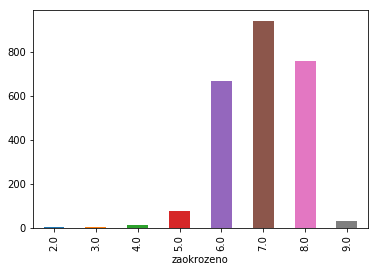

In [21]:
%matplotlib inline
stevilo = novi_filmi.groupby('zaokrozeno').size()
stevilo.plot.bar()

Tabele imajo metodo `.hist()`, ki omogoča izgradnjo histogramov za stolpce. Uporabite to metodo za prikaz poenostavljenih podatkov.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122143710>,
      dtype=object)

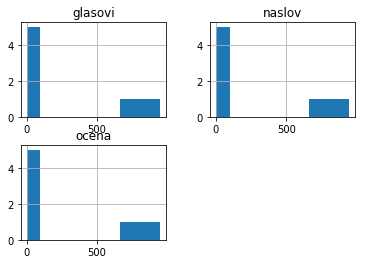

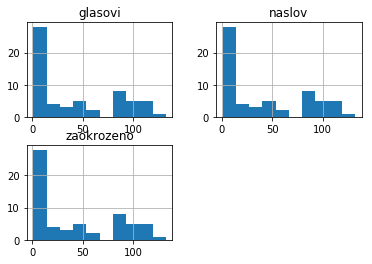

In [28]:
novi_filmi.groupby('zaokrozeno').count().hist()
novi_filmi.groupby('ocena').count().hist()

### Izris povprečne dolžine filma glede na leto

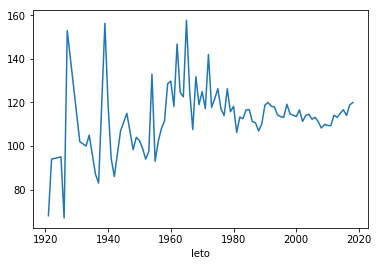

In [34]:
filmi.groupby('leto')['dolzina'].mean().plot()

### Izris skupnega zasluzka za posamezno leto

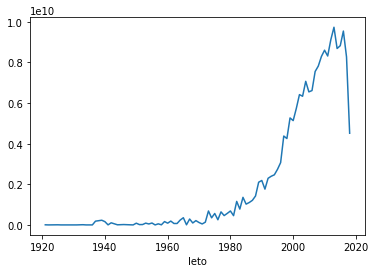

In [35]:
filmi.groupby('leto')['zasluzek'].sum().plot()